20) read a colour image and convert it binary to greyscale and viseversa.

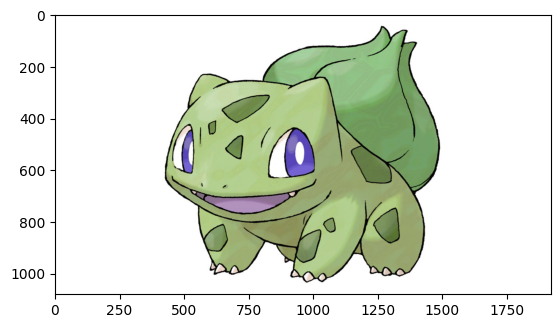

In [1]:
#read a color image in opencv.
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/poke.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img,cmap='Greys')
plt.show()

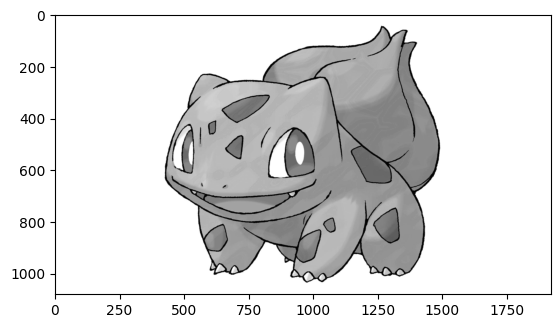

In [2]:
#convert image into greyscale.
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/poke.jpg')
img=cv2.imread('/content/poke.jpg',cv2.IMREAD_GRAYSCALE)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img,cmap='gray')
plt.show()

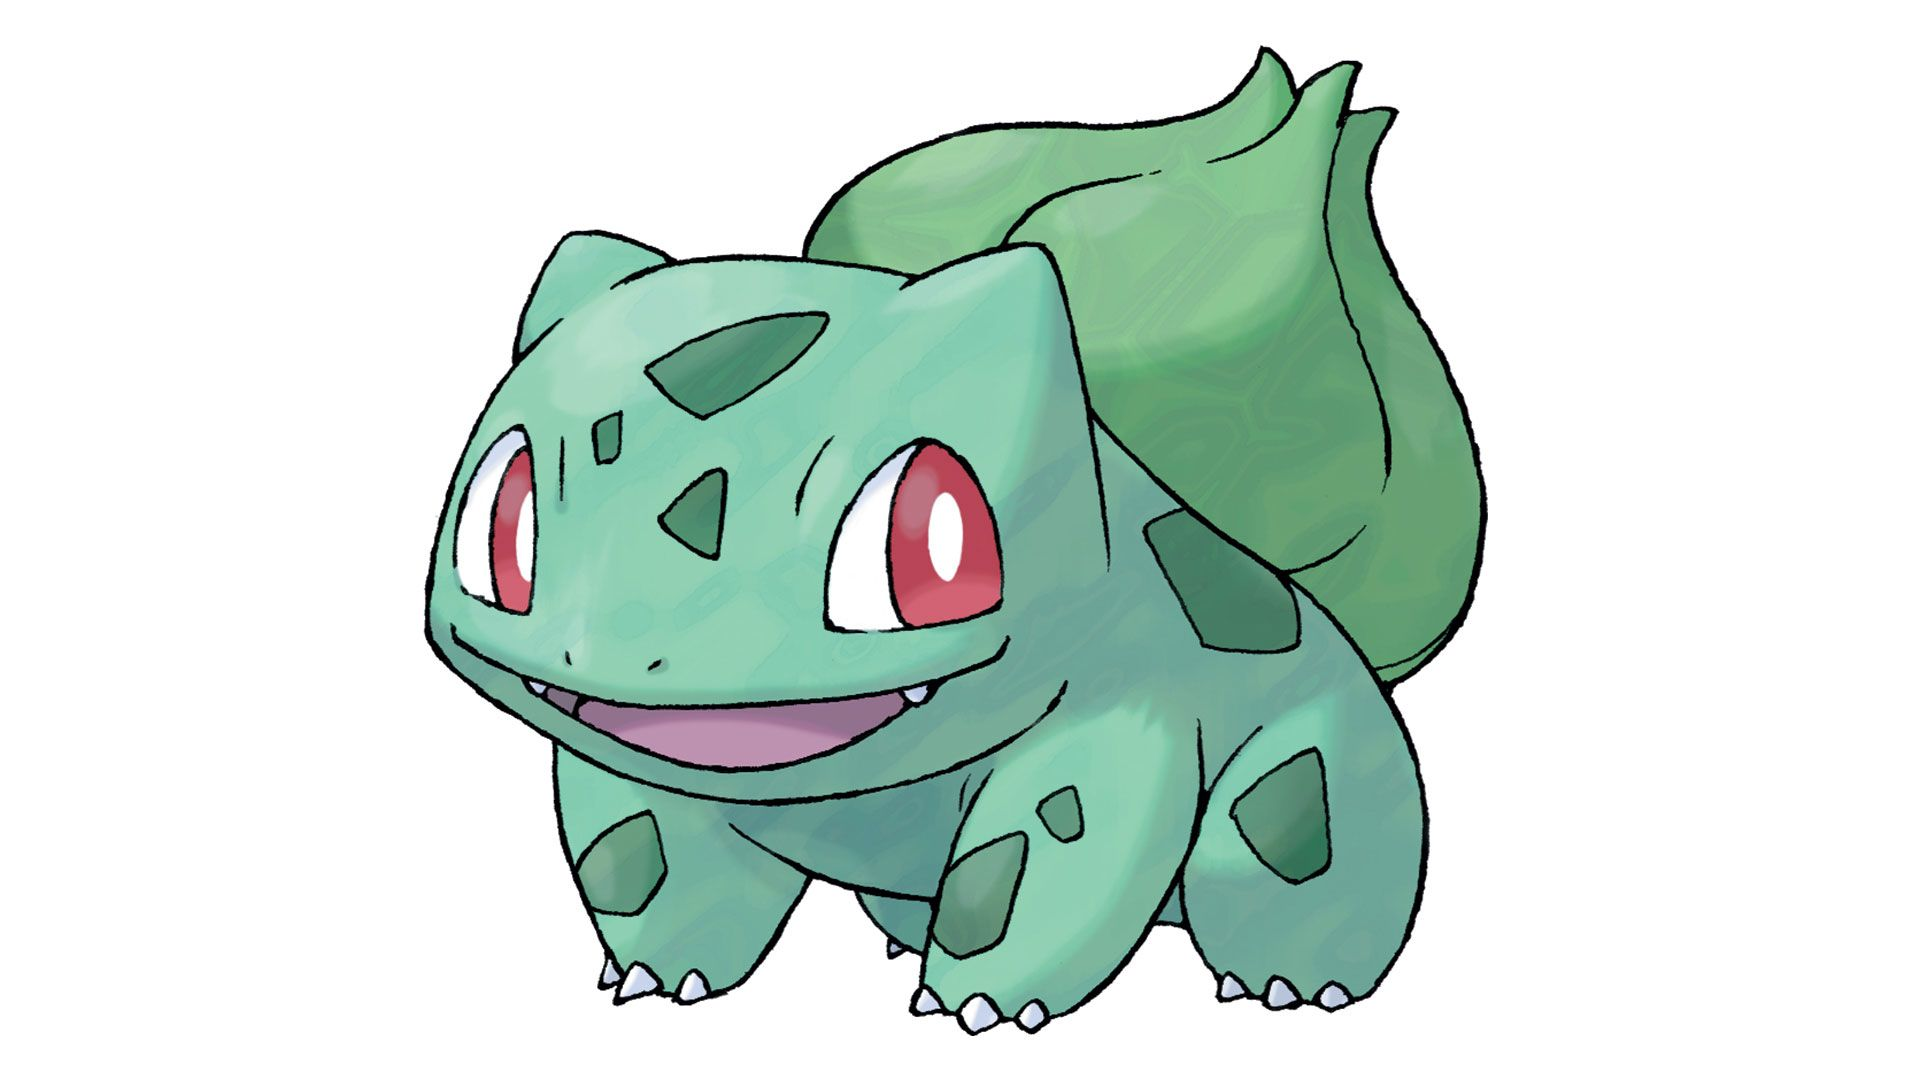

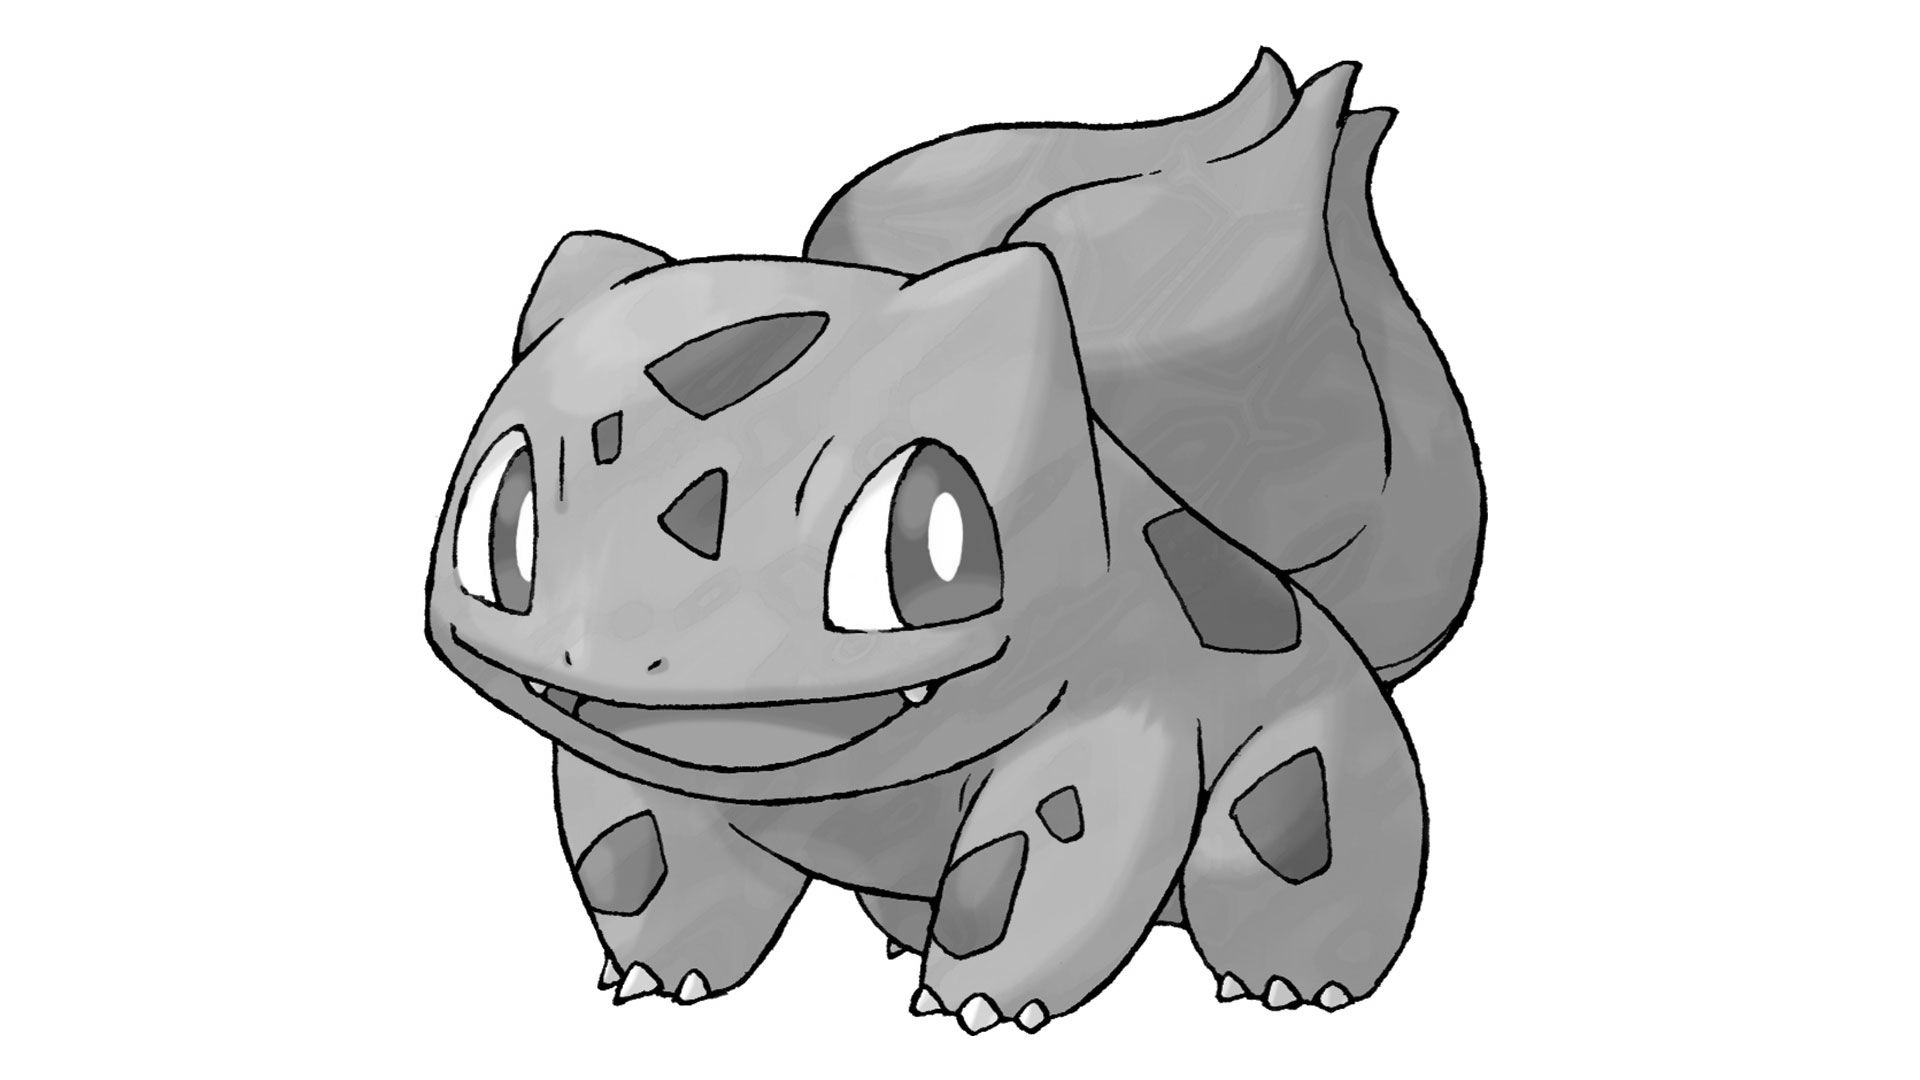

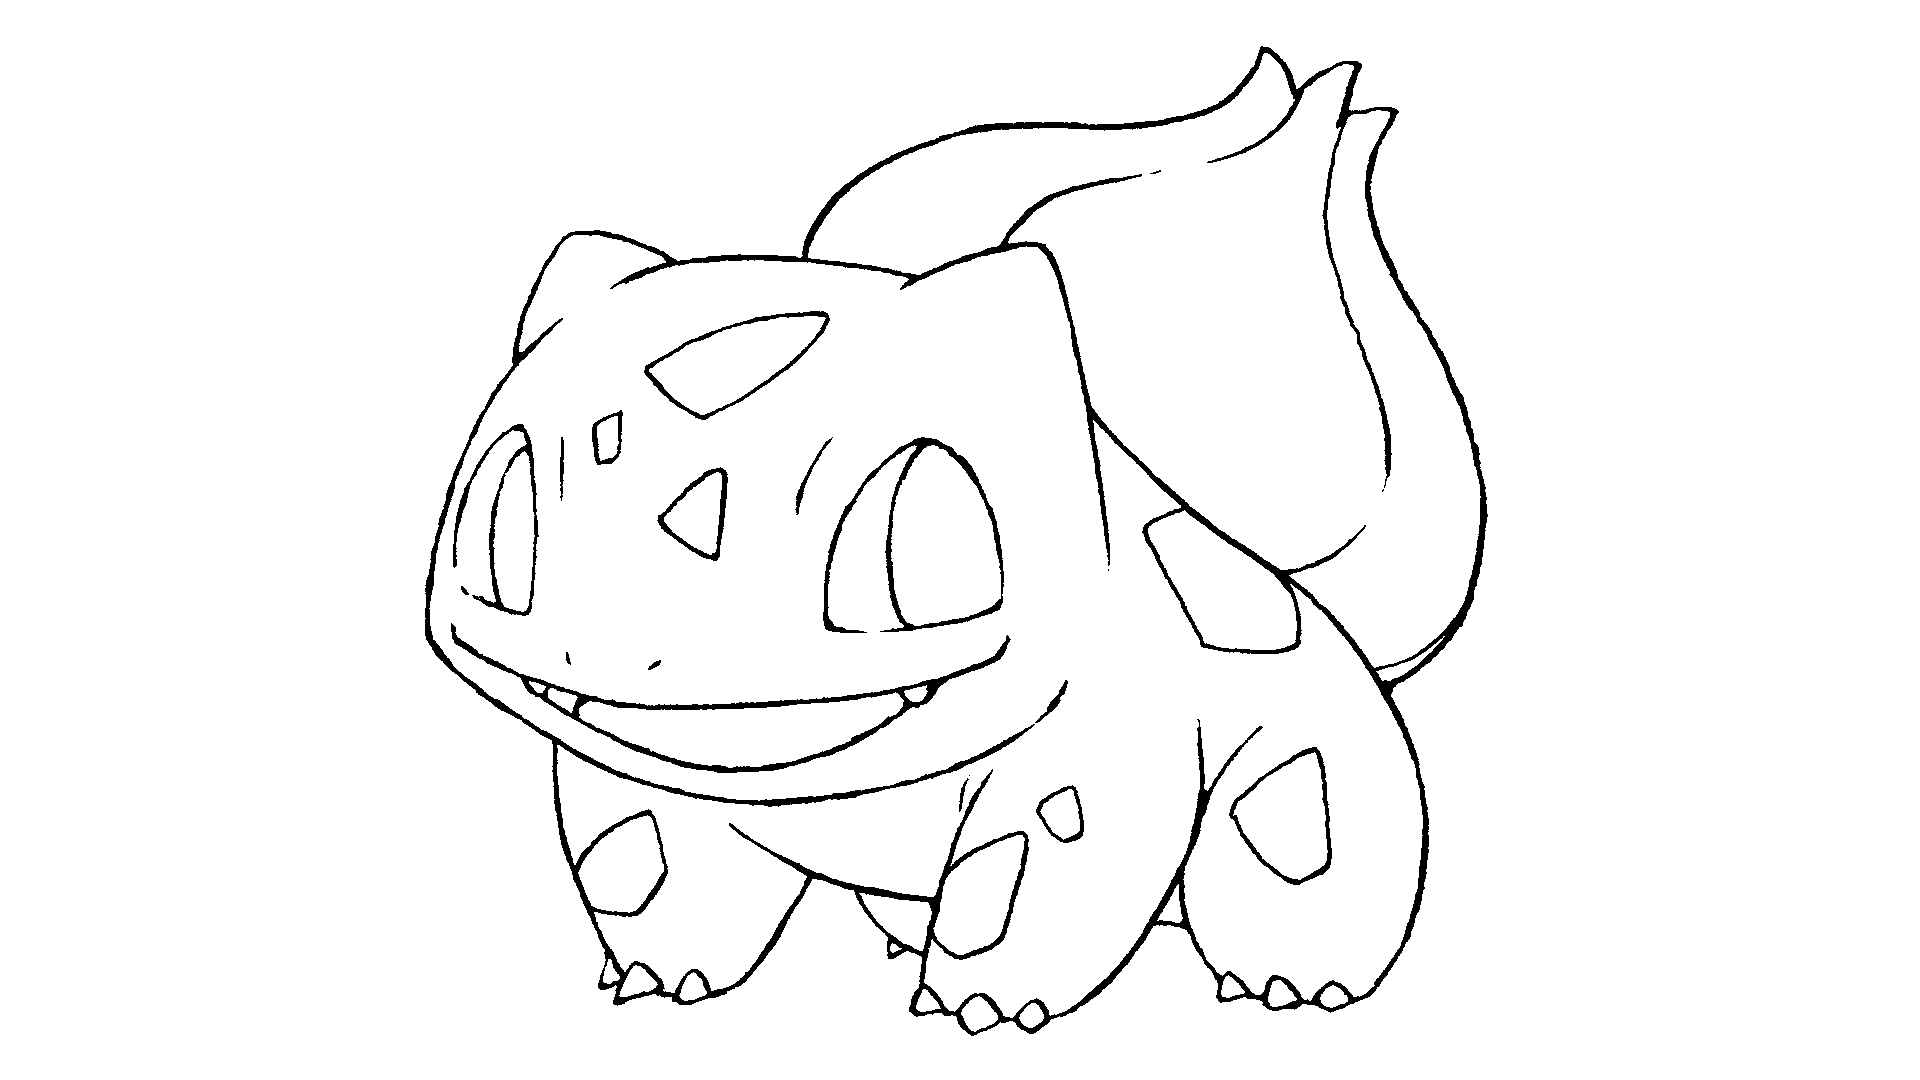

In [3]:
#convert all

import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/poke.jpg', cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(Gray_image,70,255,0)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2_imshow(Gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

21) CIFAR10 dataset load and its image classification by CNN.

In [4]:
#import packages
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.14.0


In [5]:
#download dataset online
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [6]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

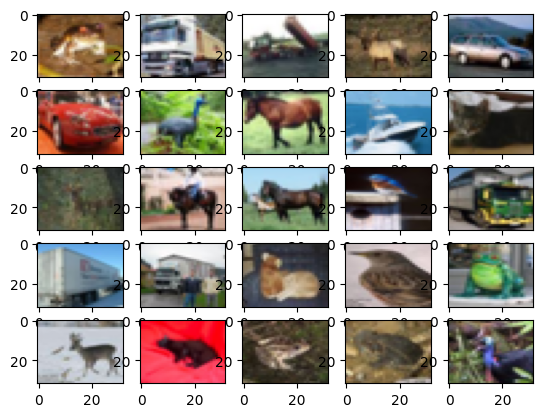

In [7]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)
(10000,)


In [9]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16,

In [10]:
model=models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(32,32,32)))
model.add(layers.MaxPooling2D((2,2),strides=1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                            
                                                                 
Total params: 25632 (100.12 KB)
Trainable params: 25632 (100.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(14,14,32)))
model.add(layers.MaxPooling2D((2,2),strides=2))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
Total params: 9248 (36.12 KB)
Trainable params: 9248 (36.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                      

22 Fashion_mnist dataset load and image processing by CNN.

In [15]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
len(train_labels)

60000

In [20]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

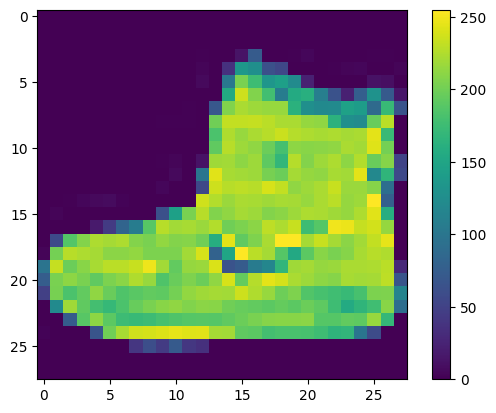

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

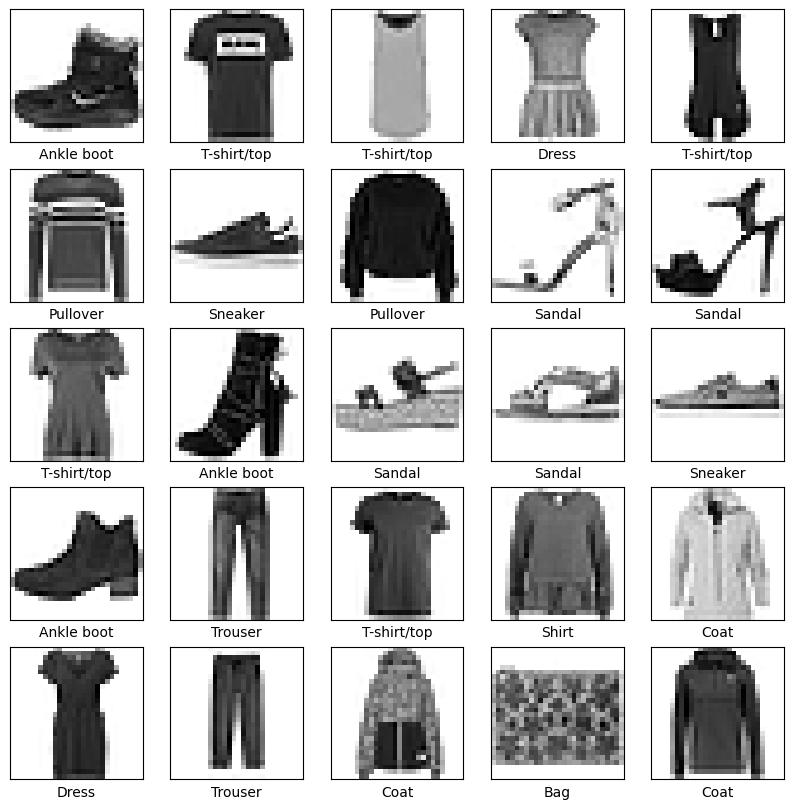

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(10)
])

In [27]:
model.compile(optimizer='Adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3017 - accuracy: 0.0777
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2982 - accuracy: 0.1513
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2903 - accuracy: 0.2244
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2714 - accuracy: 0.2095
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2538 - accuracy: 0.2263
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2283 - accuracy: 0.2303
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2078 - accuracy: 0.2234
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1907 - accuracy: 0.2189
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1753 - accuracy: 0.2148
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.161

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 2.1549 - accuracy: 0.2121 - 875ms/epoch - 3ms/step

Test accuracy: 0.21209999918937683


In [30]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [32]:
predictions[0]

array([0.07909092, 0.07444172, 0.10251844, 0.08430409, 0.075568  ,
       0.10774059, 0.09010079, 0.11766261, 0.12403032, 0.14454259],
      dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [35]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[0.12832955 0.11180822 0.11116736 0.10125744 0.13033059 0.06902633
  0.1055191  0.07953112 0.09750853 0.06552178]]


In [38]:
np.argmax(predictions_single[0])

4